In [1]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import numpy
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
from copy import deepcopy


Bad key text.latex.preview in file c:\RoboDK\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\RoboDK\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\RoboDK\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need to get an

In [2]:
def sim(a, b) :
    return np.sum(a!=b)==1

def Display(A, ax, C) :

    d = {0:[1, 3, 7], 1:[2, 6], 2:[3, 5], 3:[4], 4:[5, 7], 5:[6], 6:[7]}

    for i in range(len(A)) :
        if i in d :
            for j in d[i] :
                ax.plot((A[i, 0], A[j, 0]), (A[i, 1], A[j, 1]), (A[i, 2], A[j, 2]), c=C)

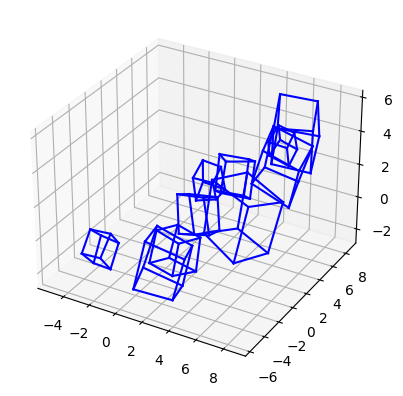

In [3]:
A = np.array([[0, 0, 0], [1, 0, 0], [1, 0, -1], [0, 0, -1], [0, -1, -1], [1, -1, -1], [1, -1, 0], [0, -1, 0]])

def Rotation(dir) :
    t = np.random.uniform(-0.2, 0.2)
    ct, st = np.cos(t), np.sin(t)
    if dir=='x' :
        return np.array([[1, 0, 0], [0, ct, -st], [0, st, ct]])
    elif dir=='y':
        return np.array([[ct, 0, -st], [0, 1, 0], [st, 0, ct]])
    else :
        return np.array([[ct, -st, 0], [st, ct, 0], [0, 0, 1]])


Population = []
N = 10

fig = plt.figure()
ax = plt.axes(projection='3d')

for i in range(N) :

    Ac = deepcopy(A)
    for _ in range(6) :
        Rx = Rotation('x')
        Ry = Rotation('y')
        Rz = Rotation('z')
        k = np.random.uniform(0.9, 1.2, 3)
        Ac = k[0]*Ac @ Rx.T   + np.random.normal(0, 0.025, Ac.shape) + np.random.uniform(-1.5, 1.5)*np.ones(Ac.shape)
        Ac = k[1]*Ac @ Ry.T
        Ac = k[2]*Ac @ Rz.T
    Population.append(Ac)
    Display(Ac, ax, 'b')

Population = np.array(Population)
plt.show()

In [4]:
Population.shape

(10, 8, 3)

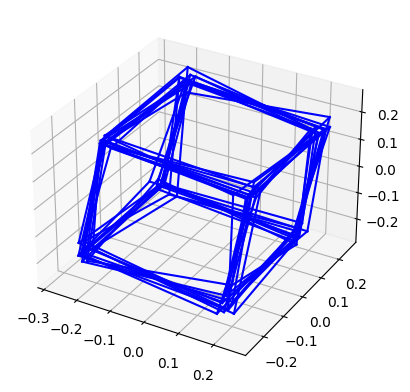

In [5]:
from scipy import spatial

fig = plt.figure()
ax = plt.axes(projection='3d')

Mean_population_shape = np.mean(Population, axis = 0)
Aligned_Pop = []
for A in Population :
    _, mtx, _ = spatial.procrustes(Mean_population_shape, A)
    Aligned_Pop.append(mtx)
    Display(mtx, ax, 'b')

plt.show()